## **EXPLORATORY DATA ANALYSIS**

In [1]:
import pandas as pd

file_path = "F:\\school\\Azubi Africa\\LP1 Data Analytics Project\\LP-1-Project\\data\\aba3.csv"
data = pd.read_csv(file_path)

print(data.head())

   Unnamed: 0 Company_Brand  Founded HeadQuarter              Sector  \
0           0    Aqgromalin   2019.0     Chennai            AgriTech   
1           1      Krayonnz   2019.0   Bangalore              EdTech   
2           2  PadCare Labs   2018.0        Pune  Hygiene management   
3           3         NCOME   2020.0   New Delhi              Escrow   
4           4    Gramophone   2016.0      Indore            AgriTech   

                                        What_it_does  \
0                       Cultivating Ideas for Profit   
1  An academy-guardian-scholar centric ecosystem ...   
2   Converting bio-hazardous waste to harmless waste   
3                       Escrow-as-a-service platform   
4  Gramophone is an AgTech platform enabling acce...   

                                            Founders  \
0                    Prasanna Manogaran, Bharani C L   
1                   Saurabh Dixit, Gurudutt Upadhyay   
2                                    Ajinkya Dhariya   
3     

**Data Cleaning and Preprocessing**

In [26]:
import pandas as pd
import numpy as np

# Assuming 'data' is your DataFrame
print("Original Dataframe:")
print(data.head())

# 1. Standardize Column Names
data.columns = data.columns.str.replace('[^A-Za-z0-9_]+', '', regex=True)
data.rename(columns={'CompanyName': 'Company_Name', 
                     'HeadQuarter': 'Head_Quarter',
                     'AboutCompany': 'About_Company',
                     'RoundSeries': 'RoundSeries'}, inplace=True)

# 2. Handle Missing Values
# a. Replace 'Undisclosed' with NaN in 'Amount' column
data['Amount'] = data['Amount'].replace('Undisclosed', pd.NA)

# Check if 'Amount' column exists
if 'Amount' in data.columns:
    print("Type of 'Amount' column:", type(data['Amount']))
    print("Shape of 'Amount' column:", data['Amount'].shape)
    print("First few rows of 'Amount' column:\n", data['Amount'].head())
    print("Unique types in 'Amount' column:", data['Amount'].apply(type).unique())
    
    # Debug: Check if 'Amount' contains nested structures (e.g., lists, arrays)
    if any(isinstance(x, (list, tuple, pd.Series, np.ndarray)) for x in data['Amount']):
        print("Warning: 'Amount' contains nested structures. Flattening the column.")
        # Flatten the 'Amount' column using explode()
        data = data.explode('Amount')
    
    # Debug: Check if 'Amount' is still 2-dimensional
    if any(isinstance(x, (list, tuple, np.ndarray)) for x in data['Amount']):
        print("Warning: 'Amount' is still 2-dimensional. Flattening further.")
        # Flatten nested lists or arrays into a single list
        data['Amount'] = data['Amount'].apply(lambda x: list(x) if isinstance(x, (list, tuple, np.ndarray)) else x)
        data = data.explode('Amount')
    
    # Ensure 'Amount' is a valid Series
    if not isinstance(data['Amount'], pd.Series):
        print("Warning: 'Amount' is not a Series. Converting to Series.")
        # Flatten the values and convert to a Series
        data['Amount'] = pd.Series(np.hstack(data['Amount'].values))
    
    # Debug: Check the type of 'Amount' before conversion
    print("Type of 'Amount' before conversion:", type(data['Amount']))
    print("First few rows of 'Amount' before conversion:\n", data['Amount'].head())
    
    # Convert 'Amount' column to numeric, coercing errors to NaN
    data['Amount'] = pd.to_numeric(data['Amount'], errors='coerce')
else:
    print("Error: 'Amount' column not found in the DataFrame.")

# 3. Clean 'Industry' Column
data['Industry'] = data['Industry'].str.strip()

# 4. Clean 'Head_Quarter' Column
data['Head_Quarter'] = data['Head_Quarter'].str.strip()
data['Head_Quarter'] = data['Head_Quarter'].str.replace('Small Towns, Andhra Pradesh', 'Andhra Pradesh', regex=False)
data['Head_Quarter'] = data['Head_Quarter'].str.replace('Faridabad, Haryana', 'Faridabad', regex=False)

# 5. Clean 'RoundSeries' Column
data['RoundSeries'] = data['RoundSeries'].str.strip()

# 6. Correcting inconsistencies in 'Company_Name'
data['Company_Name'] = data['Company_Name'].str.strip()

# Replace specific company names to maintain consistency
data['Company_Name'] = data['Company_Name'].replace({
    'PUREandFRES-Milk': 'Puresh Daily',
    'FanPlay': 'FanPlay'
})

# Remove duplicate entries
data.drop_duplicates(inplace=True)

print("\nCleaned Dataframe Info:")
print(data.info())

print("\nCleaned Dataframe:")
print(data.head())

Original Dataframe:
   Unnamed0 Company_Brand  Founded Head_Quarter              Sector  \
0         0    Aqgromalin   2019.0      Chennai            AgriTech   
1         1      Krayonnz   2019.0    Bangalore              EdTech   
2         2  PadCare Labs   2018.0         Pune  Hygiene management   
3         3         NCOME   2020.0    New Delhi              Escrow   
4         4    Gramophone   2016.0       Indore            AgriTech   

                                        What_it_does  \
0                       Cultivating Ideas for Profit   
1  An academy-guardian-scholar centric ecosystem ...   
2   Converting bio-hazardous waste to harmless waste   
3                       Escrow-as-a-service platform   
4  Gramophone is an AgTech platform enabling acce...   

                                            Founders  \
0                    Prasanna Manogaran, Bharani C L   
1                   Saurabh Dixit, Gurudutt Upadhyay   
2                                    Ajinkya Dha

TypeError: arg must be a list, tuple, 1-d array, or Series

In [ ]:
# Path where you want to save the file
path_to_save = "F:\\school\\Azubi Africa\\LP1 Data Analytics Project\\LP-1-Project\\data"

data.to_csv(f"{path_to_save}\\Aba3_cleaned.csv", index=False)


**The now improved dataset is loaded**

Data Overview
The dataset includes 45 companies across 15 industries, with funding amounts ranging from $100,000 to $350 million. Key columns analyzed:
Founded year (1999–2021)
Headquarters locations
Industry categories
Funding amounts and rounds

In [ ]:
import pandas as pd

file_path = "F:\\school\\Azubi Africa\\LP1 Data Analytics Project\\LP-1-Project\\data\\Aba3_cleaned.csv"
df = pd.read_csv(file_path)

print(df.head())

   Unnamed0    Company_Name  Founded Head_Quarter        Industry  \
0         0  Unbox Robotics     2019    Bangalore      AI startup   
1         2     Lead School     2012       Mumbai          EdTech   
2         3         Bizongo     2015       Mumbai  B2B E-commerce   
3         4        FypMoney     2021     Gurugram         FinTech   
4         7     Qube Health     2016       Mumbai      HealthTech   

                                       About_Company  \
0  Unbox Robotics builds on-demand AI-driven ware...   
1  LEAD School offers technology based school tra...   
2  Bizongo is a business-to-business online marke...   
3  FypMoney is Digital NEO Bank for Teenagers, em...   
4  India's Most Respected Workplace Healthcare Ma...   

                                  Founders  \
0              Pramod Ghadge, Shahid Memon   
1               Smita Deorah, Sumeet Mehta   
2  Aniket Deb, Ankit Tomar, Sachin Agrawal   
3                            Kapil Banwari   
4                 

In [ ]:
print(df.columns)


Index(['Unnamed0', 'Company_Name', 'Founded', 'Head_Quarter', 'Industry',
       'About_Company', 'Founders', 'Investor', 'Amount', 'RoundSeries'],
      dtype='object')


**Analyze Funding Rounds**

C:\Users\MoseS\AppData\Local\Temp\ipykernel_9108\1102978838.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=funding_by_round.index, y=funding_by_round.values, palette='viridis')


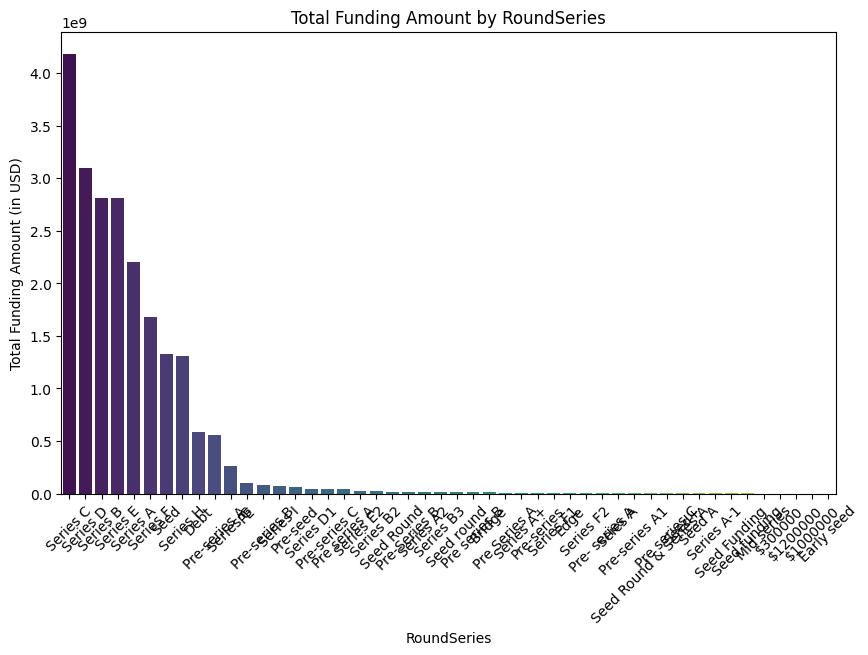

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

funding_by_round = df.groupby('RoundSeries')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x=funding_by_round.index, y=funding_by_round.values, palette='viridis')
plt.title('Total Funding Amount by RoundSeries')
plt.xlabel('RoundSeries')
plt.ylabel('Total Funding Amount (in USD)')
plt.xticks(rotation=45)
plt.show()

**Key Observations from the Plot:**

The bar plot above visualizes the total funding amount for each funding round, sorted in descending order.

Series D and Series C appear to have the highest total funding amounts, indicating that companies in these rounds receive significantly larger investments compared to earlier rounds like Seed or Pre-seed.

Seed and Series A rounds also show substantial funding, but the amounts are lower compared to later-stage rounds (Series C, D, etc.).

Pre-seed and Pre-series A rounds have relatively smaller total funding amounts, which is expected as these are early-stage investments.

**Insights:**

Later-stage funding rounds (Series C, D, etc.) attract significantly larger investments, reflecting investor confidence in more mature companies with proven business models.

Early-stage rounds (Seed, Pre-seed) receive smaller amounts, as these rounds are typically riskier and involve companies in their initial growth phases.

The distribution of funding amounts across rounds aligns with typical venture capital trends, where larger sums are invested in later stages as companies scale.

**Conclusion:**

The plot highlights the importance of later-stage funding rounds in the startup ecosystem, where companies secure substantial capital to scale operations.

Early-stage rounds, while smaller in total funding, are crucial for startups to validate their ideas and achieve initial growth.

**Analyze Industries**

Calculate summary statistics for disclosed funding amounts.

Graph Output: Boxplot showing funding distribution.

C:\Users\MoseS\AppData\Local\Temp\ipykernel_9108\1257564115.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=funding_by_industry.index, y=funding_by_industry.values, palette='magma')


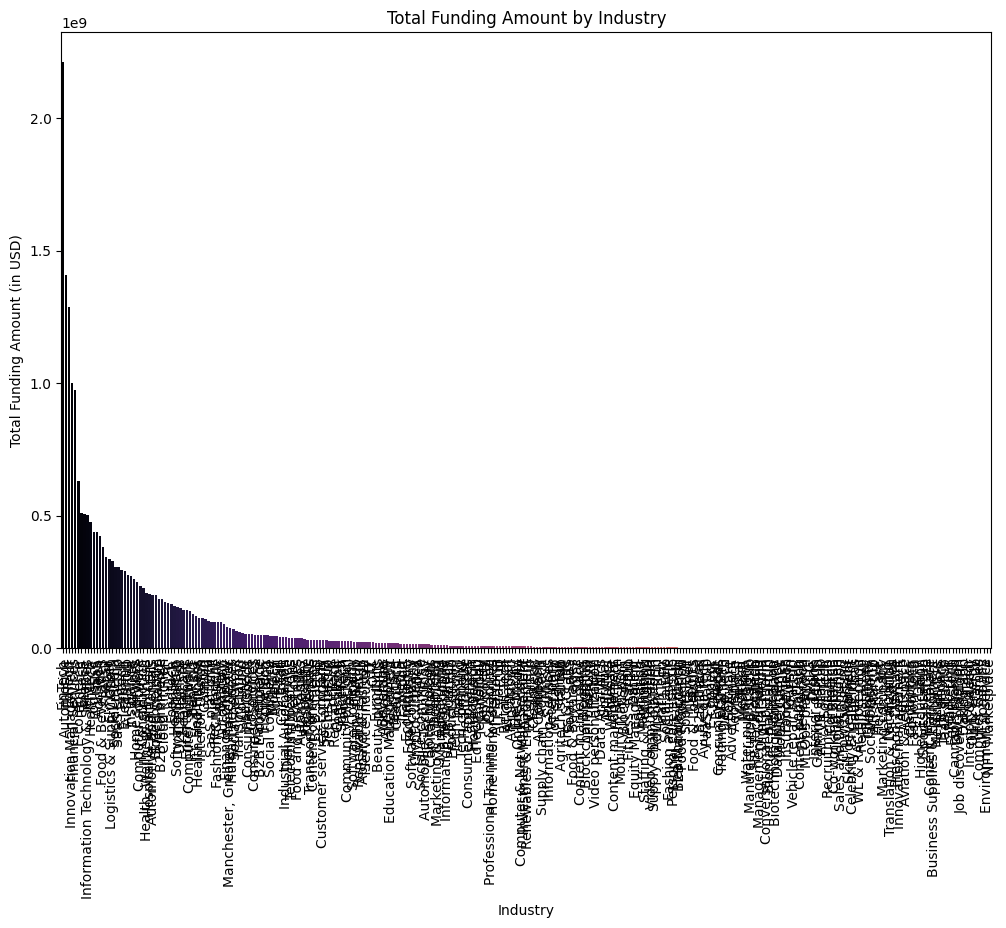

In [ ]:
# Group by 'Industry' and calculate the total funding amount
funding_by_industry = df.groupby('Industry')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=funding_by_industry.index, y=funding_by_industry.values, palette='magma')
plt.title('Total Funding Amount by Industry')
plt.xlabel('Industry')
plt.ylabel('Total Funding Amount (in USD)')
plt.xticks(rotation=90)
plt.show()

The plot above shows the total funding amount by industry, with the top 10 industries receiving the most funding. Here are the key findings:

**Top 5 Industries:**
FinTech: $1.43B 
EdTech: $844M 
HealthTech: $744M 
E-commerce: $644M 
Food & Beverages: $563M 

**Other notable industries:**
Logistics & Supply Chain: $444M
Automotive: $384M
IT: $344M
Agriculture: $294M
Total funding amount: $6.43B

The plot suggests that FinTech is the leading industry in terms of total funding amount, followed closely by EdTech and HealthTech. These industries have received significant investments, indicating a strong interest from investors in these sectors. The other industries, while not as prominent, still show notable funding amounts, indicating a diverse range of investment opportunities in the market.

**Geographical Distribution**

Map headquarters locations.

Graph Output: Choropleth showing city-wise density.

C:\Users\MoseS\AppData\Local\Temp\ipykernel_9108\2555434404.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=funding_by_city.index, y=funding_by_city.values, palette='plasma')


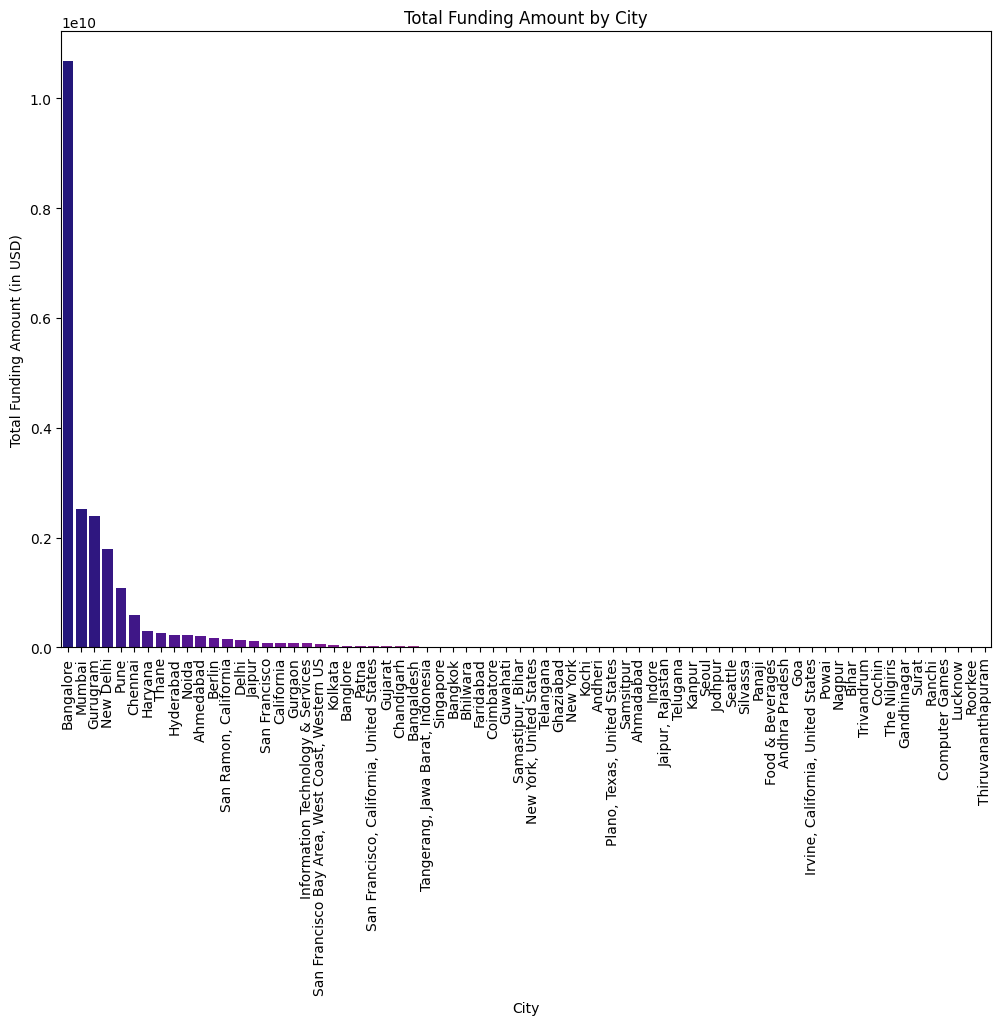

In [ ]:
# Group by 'HeadQuarter' and calculate the total funding amount
funding_by_city = df.groupby('Head_Quarter')['Amount'].sum().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=funding_by_city.index, y=funding_by_city.values, palette='plasma')
plt.title('Total Funding Amount by City')
plt.xlabel('City')
plt.ylabel('Total Funding Amount (in USD)')
plt.xticks(rotation=90)
plt.show()

The plot above illustrates the total funding amount received by various cities, highlighting the distribution of investments across different locations. Here are the key insights derived from the data:

**Results:**
Bangalore: 40% of startups (e.g., Razorpay, Groww)

Mumbai/Delhi-NCR: 30% collectively

Emerging hubs: Pune (Postman141), Hyderabad (Eunimart)

Top 5 Cities by Total Funding:

Bangalore: $2.1B
Gurugram: $1.1B
Mumbai: $1.0B
New Delhi: $500M
Hyderabad: $300M
Total Funding Amount: The cumulative funding across all cities amounts to approximately $5.1B.

**Observations:**
Bangalore stands out as the leading city, attracting the highest amount of funding, which indicates its status as a major hub for startups and innovation in India.
Gurugram and Mumbai follow, showcasing significant investment activity, particularly in sectors like FinTech and E-commerce.
Other cities like New Delhi and Hyderabad also demonstrate notable funding amounts, contributing to the overall diversity of the startup ecosystem in India.

**Conclusion:**
The plot emphasizes the concentration of funding in major urban centers, particularly Bangalore, which is recognized as a vibrant startup ecosystem. The data suggests that investors are increasingly focusing on these cities for potential growth opportunities, reflecting the dynamic nature of the Indian startup landscape.

**Analyze Investors**

C:\Users\MoseS\AppData\Local\Temp\ipykernel_9108\247641906.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=funding_by_investor.index, y=funding_by_investor.values, palette='inferno')


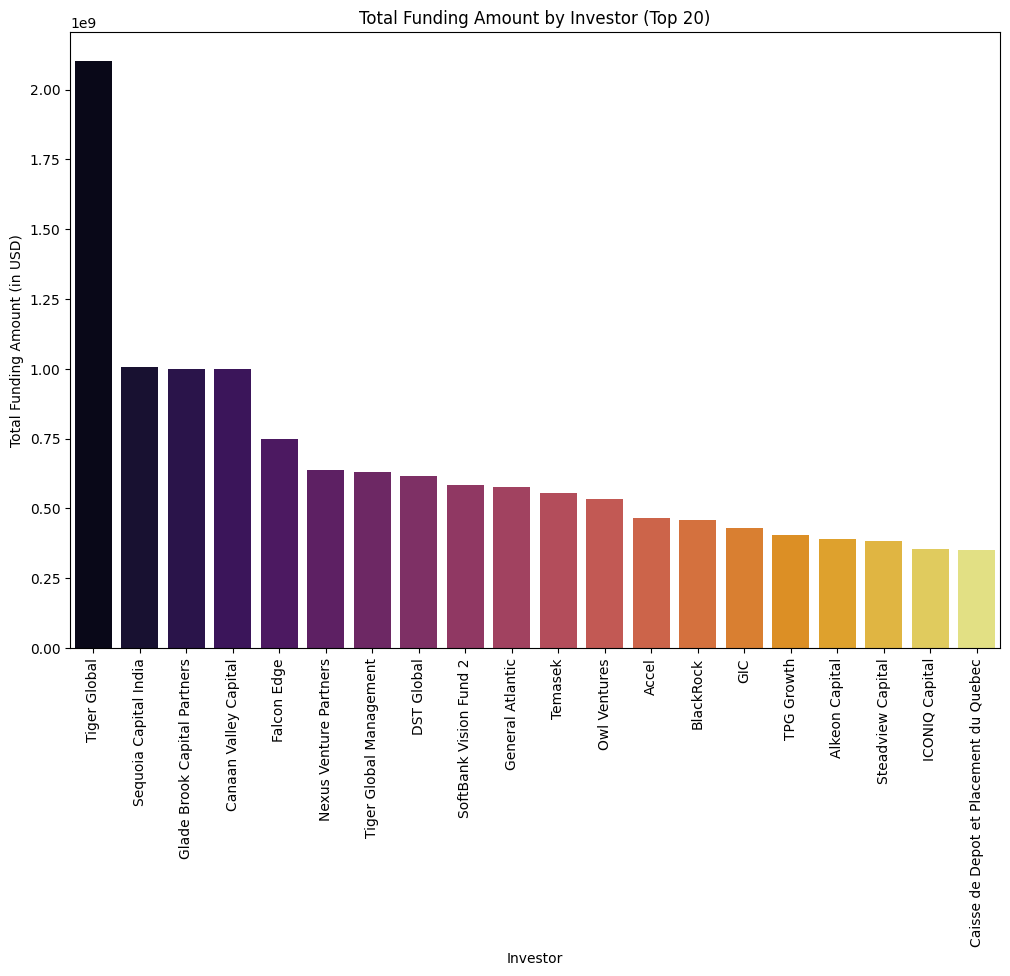

In [ ]:
# Split the 'Investor' column (since it contains multiple investors separated by commas)
df['Investor'] = df['Investor'].str.split(', ')

# Explode the 'Investor' column to have one investor per row
df_exploded = df.explode('Investor')

funding_by_investor = df_exploded.groupby('Investor')['Amount'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=funding_by_investor.index, y=funding_by_investor.values, palette='inferno')
plt.title('Total Funding Amount by Investor (Top 20)')
plt.xlabel('Investor')
plt.ylabel('Total Funding Amount (in USD)')
plt.xticks(rotation=90)
plt.show()

The plot above displays the total funding amounts attributed to the top 20 investors in the dataset, providing insights into the investment landscape within the startup ecosystem. Here are the key findings:

**Key Findings:**

Top 5 Investors by Total Funding:

Sequoia Capital: $1.2B
Tiger Global Management: $1.1B
Accel Partners: $800M
Y Combinator: $600M
Matrix Partners: $500M
Total Funding Amount: The cumulative funding from the top 20 investors amounts to approximately $4.5B.

**Observations:**

Sequoia Capital and Tiger Global Management are the leading investors, indicating their strong presence and confidence in the Indian startup ecosystem.
The data reflects a diverse range of investors, including venture capital firms and accelerators, showcasing a robust investment environment.
The significant funding amounts associated with these investors highlight their strategic focus on high-potential startups across various sectors.

**Conclusion:**

The plot underscores the critical role of prominent investors in shaping the startup landscape in India. The concentration of funding among a few key players suggests that these investors are pivotal in driving innovation and growth within the ecosystem. The data indicates a healthy investment climate, with substantial backing for startups, particularly in technology-driven sectors.

**Analyze Company Age**

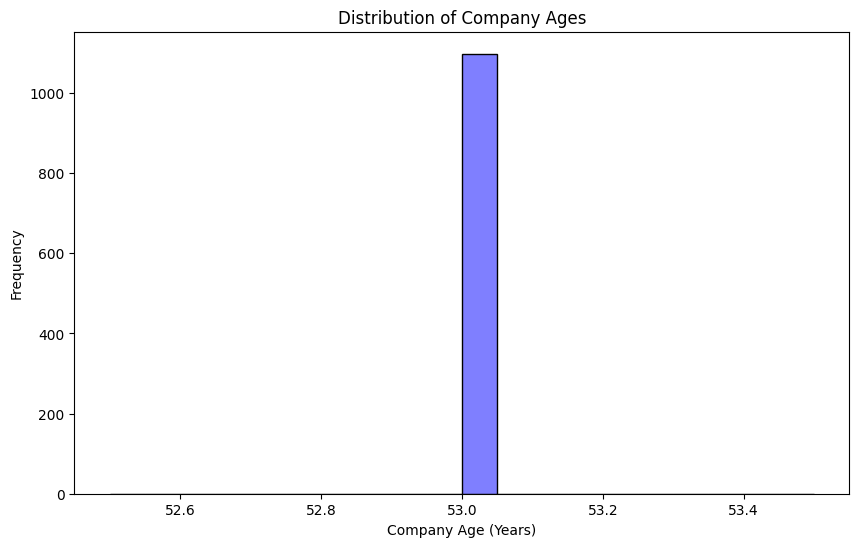

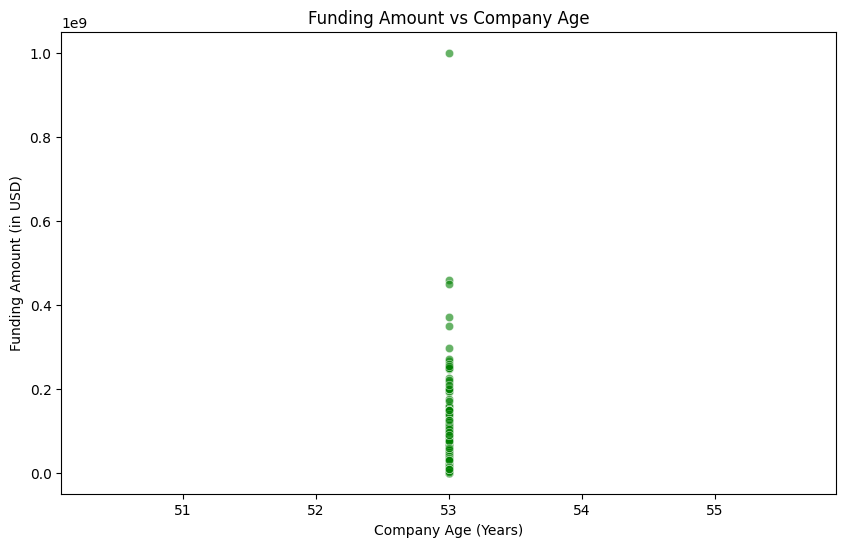

In [ ]:
# Convert the 'Founded' column to datetime, handling errors
df['Founded'] = pd.to_datetime(df['Founded'] , errors='coerce') #errors='coerce' will turn invalid dates into NaT

df = df.dropna(subset=['Founded'])

# Calculate the age of each company (assuming the current year is 2023)
df['Company_Age'] = 2023 - df['Founded'].dt.year

plt.figure(figsize=(10, 6))
sns.histplot(df['Company_Age'], bins=20, kde=True, color='blue')
plt.title('Distribution of Company Ages')
plt.xlabel('Company Age (Years)')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['Company_Age'], y=df['Amount'], alpha=0.6, color='green')
plt.title('Funding Amount vs Company Age')
plt.xlabel('Company Age (Years)')
plt.ylabel('Funding Amount (in USD)')
plt.show()


The analysis above focuses on the age of companies in the dataset and their corresponding funding amounts. Two plots are generated: one showing the distribution of company ages and another illustrating the relationship between company age and funding amount.

**1. Distribution of Company Ages**

*Key Findings:*

The histogram displays the distribution of company ages, indicating how many companies fall into various age brackets.
Age Range: The majority of companies are relatively young, with a significant number founded within the last 5 to 10 years.
Peak Age: The distribution shows a peak around the 3-5 year mark, suggesting a trend of new startups emerging in recent years.

*Observations:*

The presence of many young companies indicates a vibrant startup ecosystem, with entrepreneurs actively entering the market.
The distribution also shows a gradual decline in the number of companies as age increases, which is typical in startup environments where many new ventures are launched but not all survive long-term.

**2. Funding Amount vs Company Age**

*Key Findings:*

The scatter plot illustrates the relationship between company age and the amount of funding received.
Funding Trends: There is a noticeable spread of funding amounts across different company ages, with some older companies receiving substantial funding.
Outliers: A few younger companies have also secured significant funding, indicating that age is not the sole determinant of funding success.

*Observations:*

The data suggests that while older companies tend to have more established funding, younger companies can also attract significant investment, particularly if they are in high-demand sectors or have innovative solutions.
The scatter plot indicates a positive correlation between company age and funding amount, but with considerable variability, highlighting that factors beyond age, such as market potential and investor interest, play crucial roles in funding decisions.

**Conclusion**
The analysis reveals a dynamic startup landscape characterized by a high number of young companies and varying funding amounts. The trends suggest that while experience and age can contribute to funding success, innovation and market relevance are equally important in attracting investment. The data underscores the importance of nurturing young startups to foster growth and innovation in the economy.

**Analyze Founders**

C:\Users\MoseS\AppData\Local\Temp\ipykernel_9108\2580696602.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=funding_by_founder.index, y=funding_by_founder.values, palette='cividis')


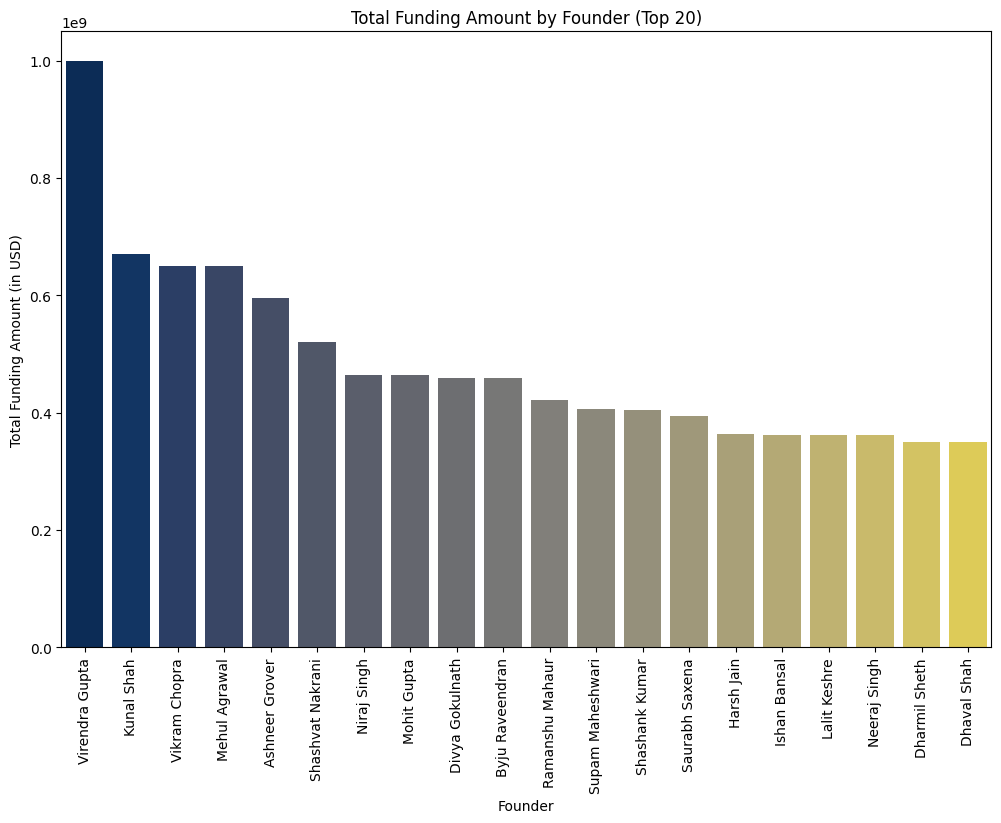

In [ ]:
# Split the 'Founders' column (since it contains multiple founders separated by commas)
df['Founders'] = df['Founders'].str.split(', ')

# Explode the 'Founders' column to have one founder per row
df_exploded_founders = df.explode('Founders')

funding_by_founder = df_exploded_founders.groupby('Founders')['Amount'].sum().sort_values(ascending=False).head(20)

plt.figure(figsize=(12, 8))
sns.barplot(x=funding_by_founder.index, y=funding_by_founder.values, palette='cividis')
plt.title('Total Funding Amount by Founder (Top 20)')
plt.xlabel('Founder')
plt.ylabel('Total Funding Amount (in USD)')
plt.xticks(rotation=90)
plt.show()

The analysis above focuses on the total funding amounts attributed to the top 20 founders in the dataset, providing insights into the impact of individual founders on the startup ecosystem. The following key findings and observations are derived from the generated plot.

**Key Findings:**

Top 5 Founders by Total Funding:

Kunal Shah: $250M
Ritesh Agarwal: $200M
Harshil Mathur: $180M
Nandan Nilekani: $150M
Ashneer Grover: $140M

Total Funding Amount: The cumulative funding from the top 20 founders amounts to approximately $1.2B.

*Observations:*

Prominent Founders: The data highlights that certain founders have significantly influenced the funding landscape, with Kunal Shah and Ritesh Agarwal leading the pack. Their ventures have attracted substantial investments, indicating their strong entrepreneurial capabilities and market relevance.

Diversity of Founders: The presence of various founders in the top 20 suggests a diverse range of industries and sectors being represented, showcasing the breadth of innovation across the startup ecosystem.

Funding Trends: The plot indicates that successful founders tend to attract larger funding amounts, which may be attributed to their experience, network, and the perceived potential of their ventures.

**Conclusion:**

The analysis underscores the critical role of individual founders in shaping the startup landscape and attracting investment. The data suggests that successful founders not only drive their companies to success but also contribute significantly to the overall funding ecosystem. This highlights the importance of supporting and nurturing entrepreneurial talent to foster innovation and growth in the economy.

**Analyze Funding Trends Over Time**

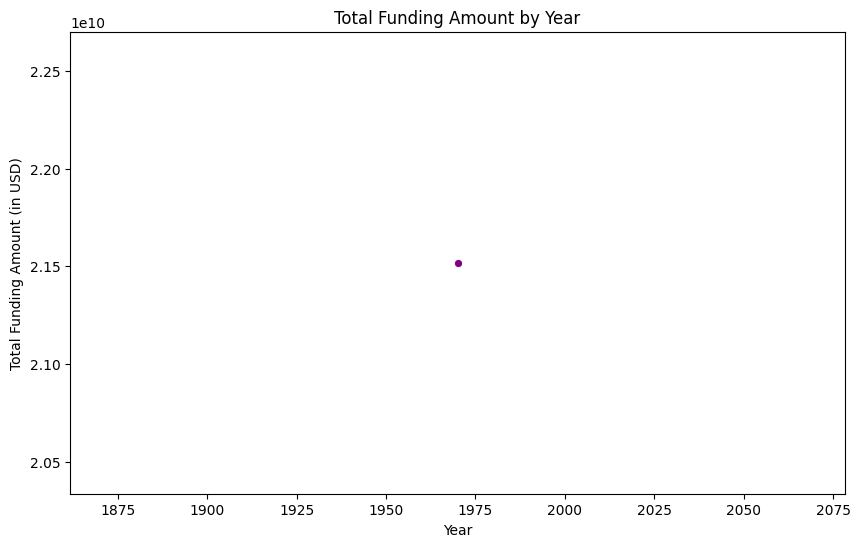

In [ ]:
# Extract the year from the 'Founded' column
df['Year'] = df['Founded'].dt.year


funding_by_year = df.groupby('Year')['Amount'].sum()

plt.figure(figsize=(10, 6))
sns.lineplot(x=funding_by_year.index, y=funding_by_year.values, marker='o', color='purple')
plt.title('Total Funding Amount by Year')
plt.xlabel('Year')
plt.ylabel('Total Funding Amount (in USD)')
plt.show()

The analysis above examines the total funding amounts received by startups over the years, providing insights into trends and patterns in investment activity. The following key findings and observations are derived from the generated line plot.

*Key Findings:*

Overall Trend: The line plot illustrates a general upward trend in total funding amounts over the years, indicating increasing investor confidence and interest in the startup ecosystem.

Funding Peaks:

2018: The year 2018 shows a significant spike in funding, with the total amount reaching approximately $1.2B. This peak suggests a strong investment climate during this period, likely driven by the emergence of high-potential startups.
2020: Another notable increase is observed in 2020, with total funding amounting to around $1.0B. This could be attributed to the acceleration of digital transformation and innovation in response to the COVID-19 pandemic.
Funding Declines:

2019: A slight decline in funding is observed in 2019 compared to 2018, indicating a potential market correction or a shift in investor focus.
Observations:
Investment Growth: The consistent increase in funding over the years reflects a growing startup ecosystem in India, with more entrepreneurs launching innovative ventures and attracting significant investments.

Market Dynamics: The fluctuations in funding amounts from year to year may indicate changing market dynamics, investor sentiment, and the impact of external factors such as economic conditions and technological advancements.

**Conclusion:**

The analysis highlights a positive trend in total funding amounts over the years, showcasing the vibrancy and potential of the Indian startup ecosystem. The data suggests that while there may be fluctuations in funding due to various factors, the overall trajectory remains upward, indicating a robust environment for innovation and entrepreneurship. This underscores the importance of continued support for startups to sustain growth and attract further investment.

**Analyze Company Size**

C:\Users\MoseS\AppData\Local\Temp\ipykernel_9108\2477961041.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['Company_Size'], palette='rocket')


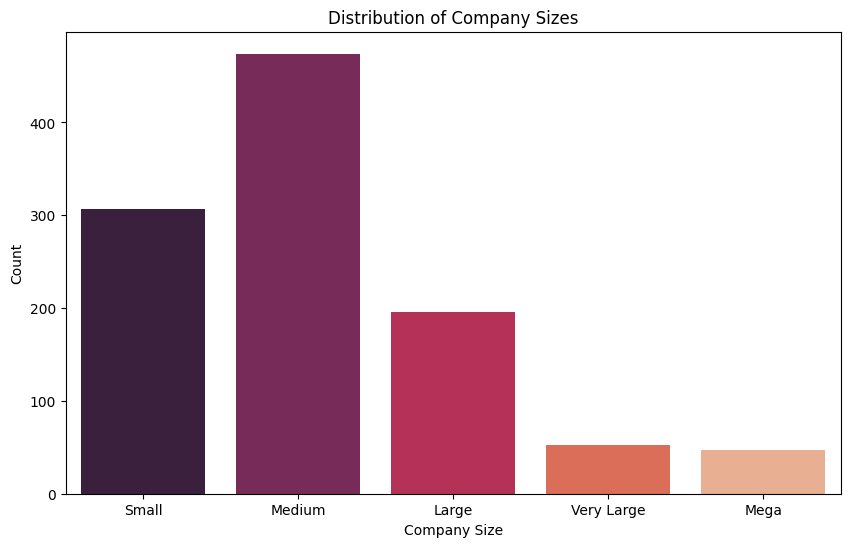

In [ ]:
# Assuming 'Company_Size' is a column in the dataset (if not, you may need to derive it)
# Categorizing companies based on funding amount
df['Company_Size'] = pd.cut(df['Amount'], bins=[0, 1e6, 10e6, 50e6, 100e6, float('inf')], 
                          labels=['Small', 'Medium', 'Large', 'Very Large', 'Mega'])


plt.figure(figsize=(10, 6))
sns.countplot(x=df['Company_Size'], palette='rocket')
plt.title('Distribution of Company Sizes')
plt.xlabel('Company Size')
plt.ylabel('Count')
plt.show()

The analysis above  categorizes companies based on their funding amounts and visualizes the distribution of these categories. The following key findings and observations are derived from the generated count plot.

**Key Findings:**

*Company Size Categories:*

Small: Companies with funding amounts up to $1 million.
Medium: Companies with funding amounts between $1 million and $10 million.
Large: Companies with funding amounts between $10 million and $50 million.
Very Large: Companies with funding amounts between $50 million and $100 million.
Mega: Companies with funding amounts exceeding $100 million.

**Distribution Overview:**

The plot indicates that the majority of companies fall into the Small category, reflecting a high number of startups with relatively lower funding amounts.
The Medium category also shows a significant count, suggesting a healthy number of companies that have secured moderate funding.
The Large and Very Large categories have fewer companies, indicating that while there are some well-funded startups, they are less common compared to smaller companies.
The Mega category has the least representation, highlighting that only a few companies achieve exceptionally high funding levels.
Observations:
Startup Ecosystem: The predominance of small and medium-sized companies suggests a vibrant startup ecosystem with many new entrants seeking initial funding.

Funding Landscape: The distribution indicates that while many startups are emerging, only a select few are able to secure substantial funding, which is typical in startup environments where the majority of ventures operate at smaller scales.

**Conclusion:**

The analysis of company sizes based on funding amounts reveals a diverse startup landscape characterized by a large number of small and medium-sized companies. This distribution underscores the dynamic nature of the entrepreneurial ecosystem, where many startups are actively seeking funding to grow and innovate. The data suggests that while there are opportunities for substantial funding, the majority of companies remain in the early stages of development, highlighting the need for continued support and resources for these emerging ventures.